# DATA SET

 This data is from online retail store based in United Kingdom from 2009-12-01 to 2011-12-09.

# VARIABLES

__Invoice__: Unique number for each transaction

__StockCode__: Unique code for each product available

__Description__: Product name in detail

__Quantity__: Number of products sold

__InvoiceDate__: Timestamp at the transaction of order

__Price__: Cost of unit product

__Customer ID__: Unique number for each customer

__Country__: Country of customers

# Business Problem

An e-commerce company wants to know its performance, identify best customers, best selling products and 
segment its customers and determine marketing strategies according to these segments.
For example, it is desirable to organize different campaigns to retain customers who are very profitable for the company, 
and different campaigns for new customers.

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# READING THE DATASET INTO DF DATAFRAME
df=pd.read_csv("sales_dataset.txt")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# LOOKING FOR OVERALL INFORMATION ABOUT DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.shape

(1067371, 8)

This data set has more than 10 lakhs records with 8 variables

# DATA CLEANING

__DUPLICATE RECORDS__



In [5]:
# Deleting duplicate records if any
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(1033036, 8)

Initially there were 1067371 records now there are 1033036 number of records. it means there are 34335 duplicates.

__MISSING VALUES__

In [7]:
# Counting the number of null values in each column
df.isna().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

Missing values are present in Customer ID column and Description columns. So let us drop missing rows.

In [8]:
# Dropping rows with missing cells
df.dropna(inplace=True)

__DATA TYPE CONVERSION__

Dtype of InvoiceDate is not a date type. So, data type has to be changed from object to datetime.
converting float Customer ID  to int. Remaining all columns appear to be ok.

In [9]:
# Converting date field to date time data type
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [10]:
# Converting Customer ID field to int type
df['Customer ID']=df['Customer ID'].astype('int')

__INACCURATE DATA__

In [11]:
# Checking for inaccurate records like negative values in quantity and price
df[df["Quantity"]<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


As  quantity can never be negative. I assume they are positive values only which were typed negative by mistake.
So, let us convert those into positive

In [12]:
# Converting column values into absolute values
df['Quantity']=df['Quantity'].abs()

In [13]:
# Checking for inaccurate price
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


There are no inaccurate values in Price column.

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


# EXPLORATORY DATA ANALYSIS

In [15]:
# Checking for unique values in each column
df.nunique()

Invoice        44876
StockCode       4646
Description     5299
Quantity         443
InvoiceDate    41439
Price           1022
Customer ID     5942
Country           41
dtype: int64

There are 5942 unique customers from 41 different countries ordering 5299 different products.

1) WHO ARE THE TOP 5 CUSTOMERS IN TERMS OF NUMBER OF ORDERS?

In [16]:
top_cust=df.groupby('Customer ID')[['Invoice']].nunique().sort_values(by='Invoice',ascending=False).reset_index()
top_cust.head()

,Customer ID,Invoice
0,14911,510
1,12748,365
2,17841,289
3,15311,270
4,14606,259


2) WHAT ARE THE TOP 5 ENGAGING COUNTRIES?

In [17]:
top_coun=df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)
top_coun.head()

Country
United Kingdom    5410
Germany            107
France              95
Spain               41
Belgium             29
Name: Customer ID, dtype: int64

3) WHAT ARE THE TOP 5 MOST ORDERING PRODUCTS?

In [18]:
top_prod=df.groupby('Description')['Invoice'].nunique().sort_values(ascending=False)
top_prod.head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    5021
REGENCY CAKESTAND 3 TIER              3659
JUMBO BAG RED RETROSPOT               2683
ASSORTED COLOUR BIRD ORNAMENT         2669
PARTY BUNTING                         2100
Name: Invoice, dtype: int64

4) HOW ARE ORDERS CHANGING YEARLY?

In [19]:
# Creating new variable Year
df['Year']=df['InvoiceDate'].dt.year

In [20]:
year_orders=df.groupby('Year')[['Invoice']].nunique().sort_values(by='Invoice',ascending=False)
year_orders=year_orders.reset_index()
year_orders

,Year,Invoice
0,2010,22494
1,2011,20482
2,2009,1900


<AxesSubplot:xlabel='Year', ylabel='Invoice'>

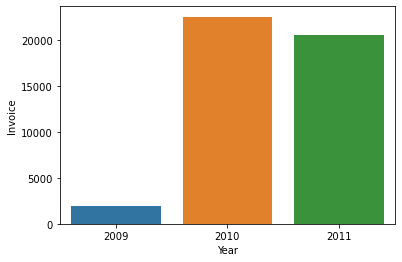

In [21]:
sns.barplot(data=year_orders,x='Year',y='Invoice',estimator=np.sum)

from 2009 to 2010 number of orders increased and then decreased in 2011.

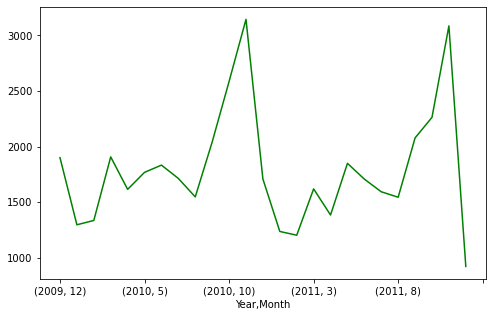

In [22]:
# Showing how orders are varying monthly in each year
df['Month']=df['InvoiceDate'].dt.month
ym=df.groupby(['Year','Month'])['Invoice'].nunique()
plt.figure(figsize=(8,5))
ym.plot(kind='line',color='g')
plt.show()

5)HOW ARE THE TOTAL SALES CHANGING YEARLY?

In [23]:
# Creating new column sales
df['Sales']=df['Quantity']*df['Price']
df['Sales'].sum()

18459617.248

In [24]:
yearly_sales=df.groupby('Year')['Sales'].sum()
yearly_sales

Year
2009     706882.920
2010    8845290.564
2011    8907443.764
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Sales'>

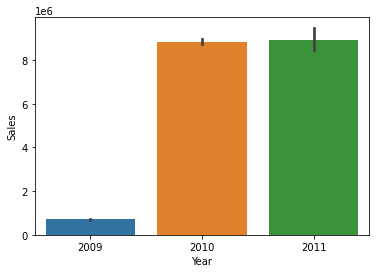

In [25]:
sns.barplot(data=df,x='Year',y='Sales',estimator=np.sum)

It can be seen that though number of orders decreased in 2010, overall sales are high. 
This is due to purchase of costly products

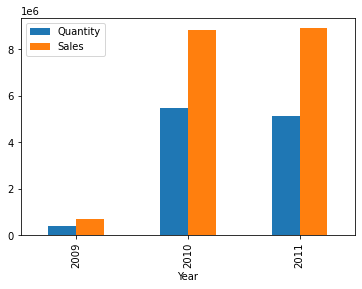

In [26]:
a=df.groupby('Year')[['Quantity','Sales']].aggregate({'Quantity':'sum','Sales':'sum'})
a.plot(kind='bar')
plt.show()

From the above plot it can be seen that from 2010 to 2011 quantity of items purchased has decreased but sales are increased.
this is due to more number of orders with high price.

5) HOW MANY ORDERS GOT CANCELLED?

In [27]:
# C in invoice indicates that they are cancelled
cancelled_orders=df[df['Invoice'].str.startswith('C')]
cancelled_orders.shape[0]

18390

from above understanding, there are 18390 rows. previously there were 18390 rows where qunatity was negative.
so it means that cancelled orders were represented with negative quantity

In [28]:
cancelled_orders['Invoice'].nunique()

7901

There are 7901 cancelled transactions

In [29]:
# Calculating gross total sales
df['Sales'].sum()-cancelled_orders['Sales'].sum()

17374804.268

6) WHICH PRODCUCTS GOT MORE CANCELLATIONS?

In [30]:
cancelled_orders['Description'].value_counts().head()

Manual                            397
REGENCY CAKESTAND 3 TIER          341
BAKING SET 9 PIECE RETROSPOT      208
STRAWBERRY CERAMIC TRINKET BOX    181
POSTAGE                           180
Name: Description, dtype: int64

Manual, REGENCY CAKESTAND 3 TIER, BAKING SET 9 PIECE RETROSPOT are the top 3 cancelled products. 
What could be the reason for the cancellation? Quality issues? No much information is provided for further analysis

# CUSTOMER SEGMENTATION (RFM ANALYSIS)

__RFM ANALYSIS__ 

RFM Analysis is a customer segmentation marketing technique that uses past purchase behavior to divide customers into clusters.
RFM helps divide customers into various categories or clusters to identify customers,perform marketing campaigns
 and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent.

__RECENCY__ 
How recently the customer has purchased?(how many days it has been since his last purchase)
It means, we have to find the customer's recent purchase date and calculate
number of days between the highest date available in the data set and customer's recent date.

In [31]:
# Creating separate date column as we do not require timestamp
df['Date']=df['InvoiceDate'].dt.date
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12,30.0,2009-12-01


In [32]:
# Most recent date in data set
max_date=df["Date"].max()
max_date

datetime.date(2011, 12, 9)

In [33]:
#creating a new data frame with unique customer id and recency
rf=df.groupby('Customer ID')[["Date"]].max()
rf['Recency']=max_date-rf['Date']
rf.head()

,Date,Recency
Customer ID,,
12346,2011-01-18,325 days
12347,2011-12-07,2 days
12348,2011-09-25,75 days
12349,2011-11-21,18 days
12350,2011-02-02,310 days


In [34]:
#As we donot require Date column, let us drop it.
rf.drop("Date",inplace=True,axis=1)
rf.reset_index(inplace=True)
rf.head()

,Customer ID,Recency
0,12346,325 days
1,12347,2 days
2,12348,75 days
3,12349,18 days
4,12350,310 days


days word is not required and make calculations messy so let us remove those

In [35]:
# dt.days will return only number
rf['Recency']=rf['Recency'].dt.days

In [36]:
rf.head()

,Customer ID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


__FREQUENCY__

Frequency helps us to know how many times a customer purchased from store. To do that we need to check how many 
unique invoices are registered by the same customer.

In [37]:
ff=df.groupby('Customer ID')[['Invoice']].nunique()
ff.columns=["Frequency"]
ff.reset_index(inplace=True)
ff.head()

,Customer ID,Frequency
0,12346,17
1,12347,8
2,12348,5
3,12349,5
4,12350,1


__MONETARY__

Monetary means how much total amount is spent by individual customer on all his orders.

In [38]:
mf=df.groupby("Customer ID")[["Sales"]].sum()
mf.columns=["Monetary"]
mf.reset_index(inplace=True)
mf.head()

,Customer ID,Monetary
0,12346,155164.66
1,12347,4921.53
2,12348,2019.40
3,12349,4452.84
4,12350,334.40


We got 3 different tables rf, ff, mf. let us merge all data frames

In [39]:
# First merging recency data frame with frequency data frame, then merging monetary data frame to get final data frame
rfm_df=rf.merge(ff,on="Customer ID")
rfm_df=rfm_df.merge(mf,on="Customer ID")
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,325,17,155164.66
1,12347,2,8,4921.53
2,12348,75,5,2019.40
3,12349,18,5,4452.84
4,12350,310,1,334.40


In [40]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 0 to 5941
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5942 non-null   int64  
 1   Recency      5942 non-null   int64  
 2   Frequency    5942 non-null   int64  
 3   Monetary     5942 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 232.1 KB


In our finalized RFM (Recency, Frequency, Monetary) table, the RFM variables represent distinct measures that need to be transformed into scores for better customer segmentation. 
(As each of these measures captures a different aspect of customer behavior they cannot be directly used)

In [41]:
# Calculating [least,Q2,mean,Q3,high] for binning.
mr=rfm_df['Recency'].min()
q1r=rfm_df['Recency'].quantile(0.25)
midr=rfm_df['Recency'].quantile(0.50)
q3r=rfm_df['Recency'].quantile(0.75)
hr=rfm_df['Recency'].max()

In [42]:
Rlimits=[-1,mr,q1r,midr,q3r,hr]
R_score=[5,4,3,2,1]

-1 to least gets 5 (highest) 
least to Q1(25 the percentile): gets high score 4
    ( because less number of days difference indicates that customer is very recent)
    
Q1 to mid: gets score 3(second highest recent customers)

mid to Q3: gets score 2(second least recent customers)
Q3 to highest: gets score 1(least recent customers)

In [43]:
# assigning scores to recency values
rfm_df['Recency']=pd.cut(rfm_df['Recency'],bins=Rlimits,labels=R_score)
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,2,17,155164.66
1,12347,4,8,4921.53
2,12348,3,5,2019.40
3,12349,4,5,4452.84
4,12350,2,1,334.40


In [44]:
rfm_df.isna().sum()

Customer ID    0
Recency        0
Frequency      0
Monetary       0
dtype: int64

In [45]:
# Calculating [least,Q2,mean,Q3,high] for binning.
mf=rfm_df['Frequency'].min()
q1f=rfm_df['Frequency'].quantile(0.25)
midf=rfm_df['Frequency'].quantile(0.50)
q3f=rfm_df['Frequency'].quantile(0.75)
hf=rfm_df['Frequency'].max()

In [46]:
Flimits=[-1,mf,q1f,midf,q3f,hf]
F_score=[1,2,3,4,5]

In [47]:
# assigning scores to frequency values
rfm_df['Frequency']=pd.cut(rfm_df['Frequency'],bins=Flimits,labels=F_score)
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,2,5,155164.66
1,12347,4,4,4921.53
2,12348,3,4,2019.40
3,12349,4,4,4452.84
4,12350,2,1,334.40


In [48]:
# Calculating [least,Q2,mean,Q3,high] for binning.
mm=rfm_df['Monetary'].min()
q1m=rfm_df['Monetary'].quantile(0.25)
midm=rfm_df['Monetary'].quantile(0.50)
q3m=rfm_df['Monetary'].quantile(0.75)
hm=rfm_df['Monetary'].max()

In [49]:
Mlimits=[-1,mm,q1m,midm,q3m,hm]
M_score=[1,2,3,4,5]

In [50]:
# assigning scores to monetary values
rfm_df['Monetary']=pd.cut(rfm_df['Monetary'],bins=Mlimits,labels=M_score)
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,2,5,5
1,12347,4,4,5
2,12348,3,4,4
3,12349,4,4,5
4,12350,2,1,2


-1 is given( you can give any value which doesnt lie in data set) because the least value in the bin is exclsuive
to make the least value inclusive another value is considered.

In [51]:
# Calculating RFM score

In [52]:
# Converting dtype to string
rfm_df['Recency']=rfm_df['Recency'].astype('str')
rfm_df['Frequency']=rfm_df['Frequency'].astype('str')
rfm_df['Monetary']=rfm_df['Monetary'].astype('str')

In [53]:
# creating new column RFM_score for final clustering
rfm_df['RFM_score']=rfm_df['Recency']+rfm_df['Frequency']+rfm_df['Monetary']
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,RFM_score
0,12346,2,5,5,255
1,12347,4,4,5,445
2,12348,3,4,4,344
3,12349,4,4,5,445
4,12350,2,1,2,212


In [54]:
#Creating a temporary integer type rfm_score column for calculating quantiles
rfm_df['RFM']=rfm_df['RFM_score'].astype('int')

In [55]:
# Calculating [least,Q2,mean,Q3,high] for binning.
least=rfm_df['RFM'].min()
q1=rfm_df['RFM'].quantile(0.25)
q2=rfm_df['RFM'].quantile(0.50)
q3=rfm_df['RFM'].quantile(0.75)
highest=rfm_df['RFM'].max()

Clustering them into 5 categories: 
    Top values customers as Platinum Customers, 
    second top as gold, 
    third top as silver, 
    last but one as raising stars, 
    least as fading flames it means they hive high rate of churning.

In [56]:
limits=[-1,least,q1,q2,q3,highest]
cluster=["Fading Flames","Raising Stars","Silver Customers","Gold Customers","Platinum Customers"]

In [57]:
# assigning scores to monetary values
rfm_df['RFM']=pd.cut(rfm_df['RFM'],bins=limits,labels=cluster)
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary,RFM_score,RFM
0,12346,2,5,5,255,Silver Customers
1,12347,4,4,5,445,Platinum Customers
2,12348,3,4,4,344,Gold Customers
3,12349,4,4,5,445,Platinum Customers
4,12350,2,1,2,212,Raising Stars


In [58]:
#  let us drop all columns except RFM as they are of no use now
rfm_df.drop(columns=['Recency','Frequency','Monetary','RFM_score'],inplace=True,axis=1)
rfm_df.head()

,Customer ID,RFM
0,12346,Silver Customers
1,12347,Platinum Customers
2,12348,Gold Customers
3,12349,Platinum Customers
4,12350,Raising Stars


In [59]:
# Changing the column names 
rfm_df.columns=['Customer ID','Segments']

In [60]:
rfm_df

,Customer ID,Segments
0,12346,Silver Customers
1,12347,Platinum Customers
2,12348,Gold Customers
3,12349,Platinum Customers
4,12350,Raising Stars
...,...,...
5937,18283,Platinum Customers
5938,18284,Raising Stars
5939,18285,Raising Stars
5940,18286,Raising Stars


__ANALYSIS ON RFM SEGMENTS DATA FRAME__

 WHAT IS THE DISTRIBUTION OF SEGMENTS?

In [61]:
# Let us make a copy of rfm table
data=rfm_df.copy(deep=True)
data.head()

,Customer ID,Segments
0,12346,Silver Customers
1,12347,Platinum Customers
2,12348,Gold Customers
3,12349,Platinum Customers
4,12350,Raising Stars


In [62]:
data['Segments'].value_counts()

Raising Stars         1737
Gold Customers        1539
Platinum Customers    1432
Silver Customers      1232
Fading Flames            2
Name: Segments, dtype: int64

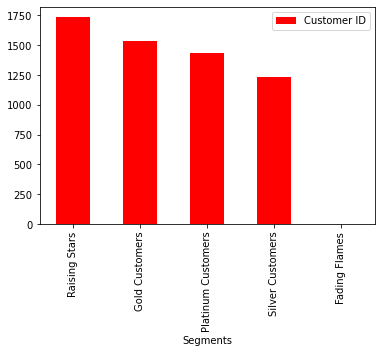

In [63]:
count_seg=data.groupby('Segments')[['Customer ID']].nunique().sort_values(by='Customer ID',ascending=False)
count_seg.plot(kind="bar",color='r')
plt.show()


In [64]:
# Merging data with df
a=df.merge(data,on='Customer ID')
a.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,Date,Segments
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009,12,83.4,2009-12-01,Silver Customers
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0,2009-12-01,Silver Customers
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009,12,81.0,2009-12-01,Silver Customers
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009,12,100.8,2009-12-01,Silver Customers
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009,12,30.0,2009-12-01,Silver Customers


WHICH COUNTRY HAS MOST VALUED CUSTOMERS (PLATINUM CUSTOMERS)?

In [65]:
pc=a.loc[a['Segments']=='Platinum Customers']
pc[['Country']].value_counts().head()

Country       
United Kingdom    380070
EIRE               15562
Germany            10435
France              9894
Netherlands         4132
dtype: int64

WHICH CUSTOMERS ARE BRINGING HIGH REVENUE?

In [69]:
a.groupby('Segments')['Sales'].sum().sort_values(ascending=False)

Segments
Platinum Customers    1.112261e+07
Gold Customers        3.668642e+06
Silver Customers      2.436722e+06
Raising Stars         1.231645e+06
Fading Flames         0.000000e+00
Name: Sales, dtype: float64

United Kingdom has most valued customers followed by  eire, germany, france.

HOW IS THE GROWTH TREND OF PLATINUM CUSTOMERS YEARLY?

In [66]:
py=a.groupby('Year')['Segments'].count()
py

Year
2009     31276
2010    391358
2011    375251
Name: Segments, dtype: int64

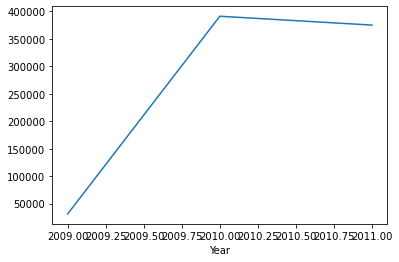

In [67]:
py.plot(kind='line')
plt.show()

from 2009 to 2010 the number of platinum customers increased drastically further we cannot see much growth.

# INSIGHTS

-  The business is more centered in UK.
-  WHITE HANGING HEART T-LIGHT HOLDER is the high demand product in terms of orders
-  No proper monthly orders trend could be seen. The orders are varying. No stability.
-  Manual, REGENCY CAKESTAND 3 TIER, BAKING SET 9 PIECE RETROSPOT are the top 3 cancelled products.
What could be the reason for the cancellation? Quality issues? No much information is provided for further analysis.
-  Though platinum customers are bringing more revenue, Raising Stars are the customers who are more engaged in terms of orders.

# RECOMMENDATIONS

-  The business has to be expanded in other countries too for better sales.
-  Further investigation is needed for the products which have least sales.(Whether they are profitable or not).If sales and profit both are less then better to focus on other products.
-  Quality of cancelled products has to be checked.
-  Raising stars are most engaging customers, so special offers or discounts( less %) must be provided in order to retain them.
-  platinum customers are most value genrating customers in terms of revenue. Offers or bonus points and better recommendations of products must be given to retain them.
- Fading flames are low so, marketing especially to them is required to encourage and promote business.

